# Hotel Booking Cancellation Prediction

Zixia Zhou / Runan Zhang

### Introduction
In our project, we focus on the development of a machine learning model for predicting hotel booking cancellations. The model aims to enhance decision-making processes in the hotel industry and mitigate the impact of cancellations.

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

### 2. Load Dataset

In [2]:
df0 = pd.read_csv('booking.csv')
df0.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### 3. Exploratory Data Analysis

In order to have a comprehensive understanding of the dataset, first, let's examine the statistical summary of variables.

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [4]:
df0.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


'Booking_ID' and 'date of reservation' serve as a unique identifier for each booking and doesn't provide any meaningful information for our analysis, so let's drop them.

In [5]:
df1 = df0.drop('Booking_ID',axis=1)
df2 = df1.drop('date of reservation',axis=1)
df2.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled


Next, let's check the unique value and missing value.

In [6]:
df2.nunique()

number of adults               5
number of children             6
number of weekend nights       8
number of week nights         18
type of meal                   4
car parking space              2
room type                      7
lead time                    352
market segment type            5
repeated                       2
P-C                            9
P-not-C                       59
average price               3930
special requests               6
booking status                 2
dtype: int64

In [7]:
df2.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
dtype: int64

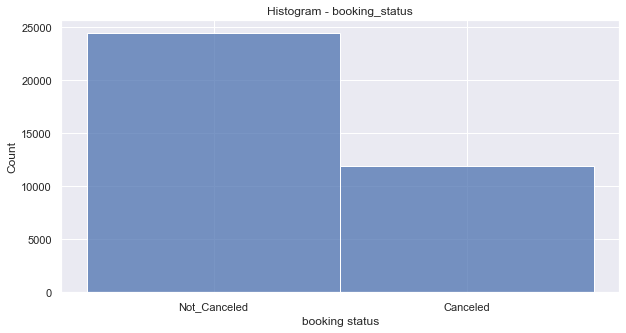

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.histplot(df2['booking status']).set(title="Histogram - booking_status")
plt.show()

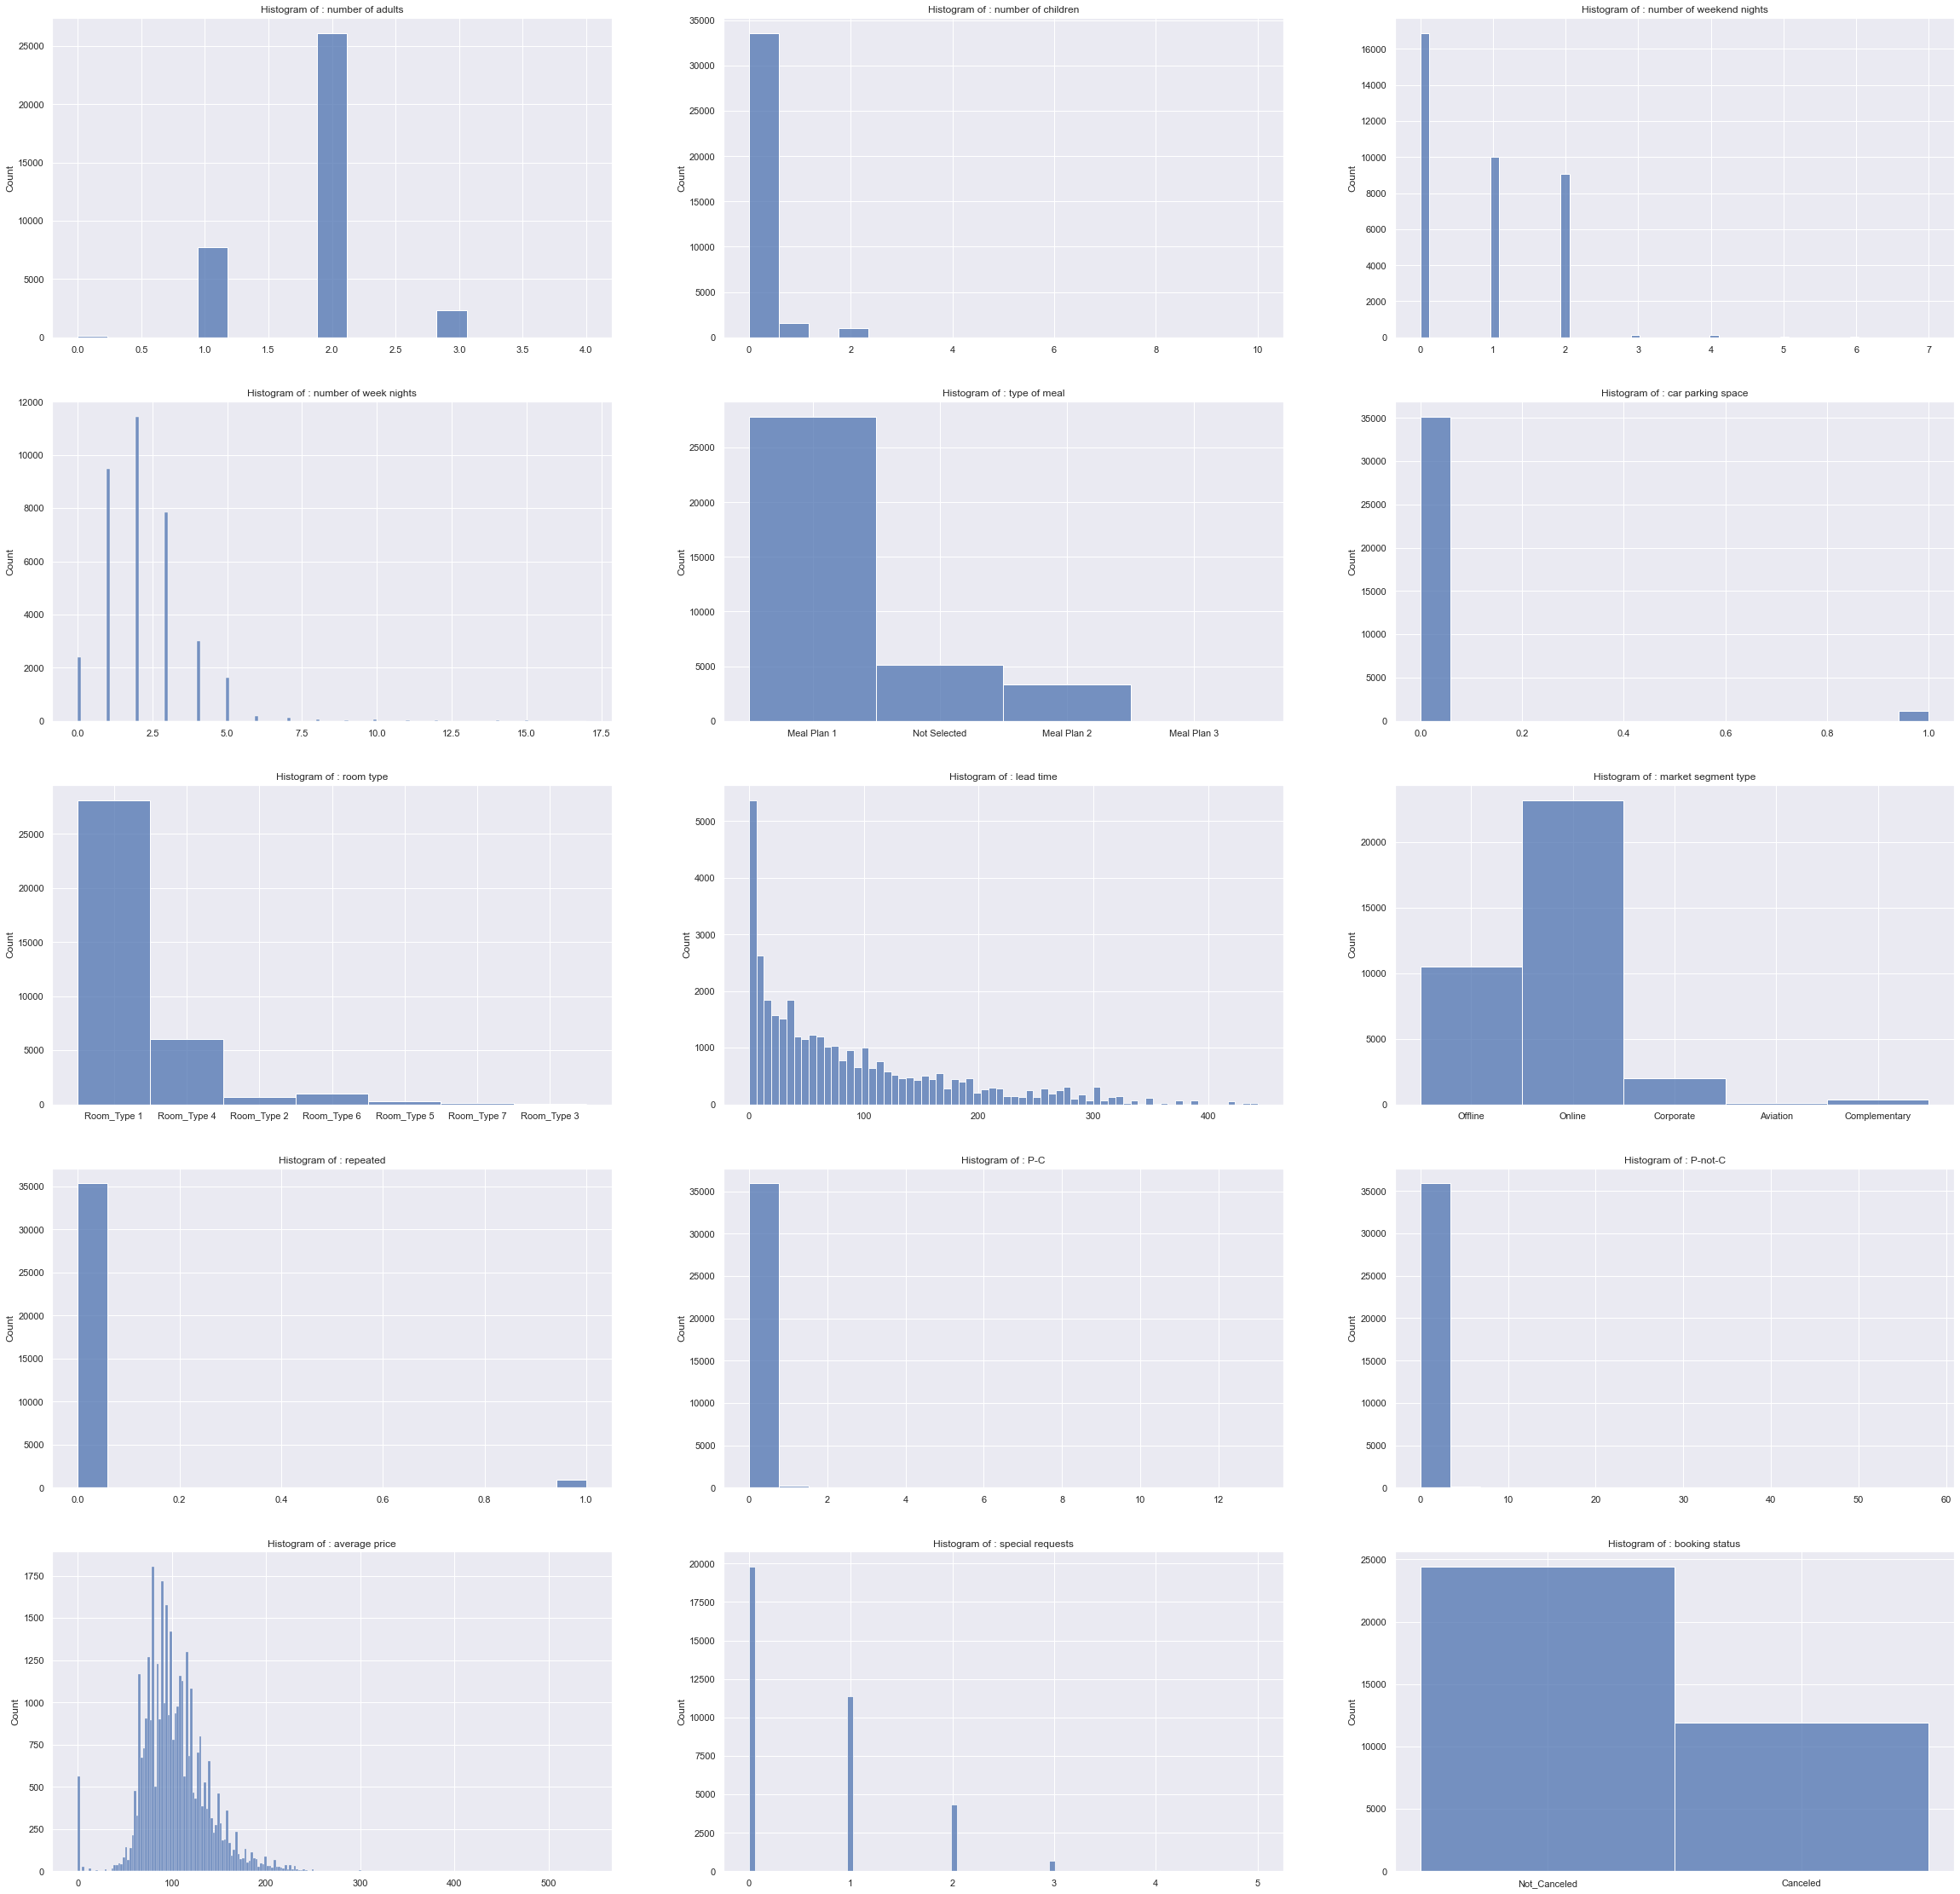

In [9]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(40, 40))
for i, ax in zip(df2.columns, axes.flat):
    sns.histplot(x=df2[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.show()

From the graph, it exhibits imbalance in our dataset. ‘Canceled'(1) significant fewer than 'Not Canceled'(0). We should oversampling/undersampling the minority/majority class to ensure that models are not biased towards the majority class.

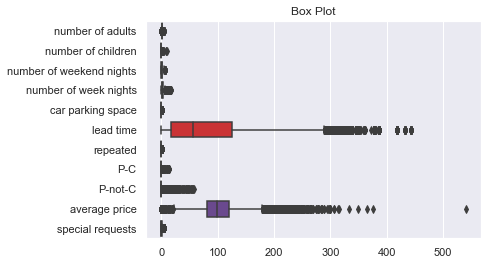

In [10]:
sns.boxplot(data=df2,palette="Paired",orient="h")
plt.title("Box Plot")
plt.show()

In the box plot, it indicates the presence of outliers in both 'lead time' and 'average price'. Addressing these outliers is crucial to mitigate potential noise and enhance prediction accuracy. To achieve this, we should consider removing the outliers from the dataset.

In [11]:
corr = df2.corr(method="spearman")
corr

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
number of adults,1.000000,0.029264,0.119539,0.136364,0.009691,0.166194,-0.202760,-0.099651,-0.206489,0.283409,0.199109
number of children,0.029264,1.000000,0.031262,0.019107,0.032844,-0.025848,-0.037549,-0.026429,-0.033930,0.243591,0.134978
number of weekend nights,0.119539,0.031262,1.000000,0.018352,-0.030233,0.099385,-0.067923,-0.032245,-0.066066,-0.026499,0.065741
number of week nights,0.136364,0.019107,0.018352,1.000000,-0.054664,0.245357,-0.114470,-0.045173,-0.123047,0.018212,0.045039
car parking space,0.009691,0.032844,-0.030233,-0.054664,1.000000,-0.078728,0.110916,0.032413,0.118162,0.056357,0.094354
lead time,0.166194,-0.025848,0.099385,0.245357,-0.078728,1.000000,-0.195860,-0.101143,-0.190871,-0.020490,-0.080586
repeated,-0.202760,-0.037549,-0.067923,-0.114470,0.110916,-0.195860,1.000000,0.597869,0.932775,-0.177644,-0.013265
P-C,-0.099651,-0.026429,-0.032245,-0.045173,0.032413,-0.101143,0.597869,1.000000,0.416711,-0.102532,-0.024165
P-not-C,-0.206489,-0.033930,-0.066066,-0.123047,0.118162,-0.190871,0.932775,0.416711,1.000000,-0.177786,0.000728
average price,0.283409,0.243591,-0.026499,0.018212,0.056357,-0.020490,-0.177644,-0.102532,-0.177786,1.000000,0.197772


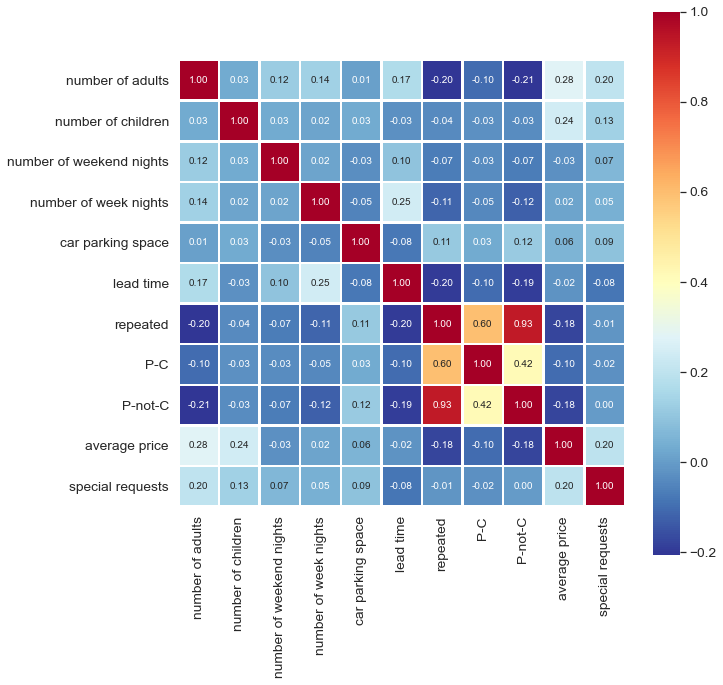

In [12]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10},cmap=plt.cm.RdYlBu_r
)
plt.show()

The features 'repeated' and 'P-not-C' show a high positive correlation of 0.93. This implies that repeat customers tend to have a higher number of previous bookings that were not canceled by the customer prior to the current booking('P-not-C'). Due to the highly correlation between two features, we choose 'repeated' as a proxy of "P-not-C" and drop "P-not-C" to avoid multicollinearity in our model.

In [13]:
df3=df2.drop('P-not-C',axis=1)
df3.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,77.00,0,Canceled


### 4. Data preprocessing

Remove outliers

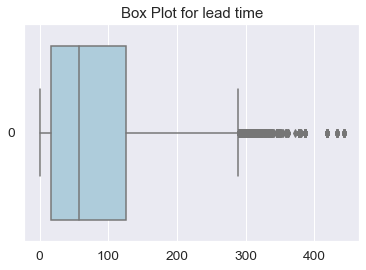

In [14]:
sns.boxplot(data=df3['lead time'],palette="Paired",orient="h")
plt.title("Box Plot for lead time")
plt.show()

In [15]:
Q1 = df3['lead time'].quantile(0.25)
Q3 = df3['lead time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_leadtime = df3['lead time'][(df3['lead time'] < lower_bound) | (df3['lead time'] > upper_bound)]
non_outlier_data_leadtime = df3['lead time'][(df3['lead time'] >= lower_bound) & (df3['lead time'] <= upper_bound)]

print("Outliers:\n", outliers_leadtime)
print("\nNon-outlier data:\n", non_outlier_data_leadtime)

Outliers:
 5        346
96       320
118      443
120      317
170      317
        ... 
36171    315
36178    386
36191    304
36248    292
36280    346
Name: lead time, Length: 1332, dtype: int64

Non-outlier data:
 0        224
1          5
2          1
3        211
4         48
        ... 
36279     48
36281     34
36282     83
36283    121
36284     44
Name: lead time, Length: 34953, dtype: int64


In [16]:
df4 = df3[(df3['lead time'] >= lower_bound) & (df3['lead time'] <= upper_bound)]

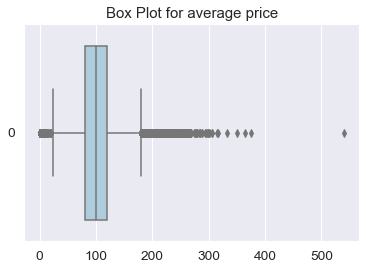

In [17]:
sns.boxplot(data=df3['average price'],palette="Paired",orient="h")
plt.title("Box Plot for average price")
plt.show()

In [18]:
Q1_AP = df4['average price'].quantile(0.25)
Q3_AP = df4['average price'].quantile(0.75)
IQR_AP = Q3_AP - Q1_AP

lower_bound1 = Q1_AP - 1.5 * IQR_AP
upper_bound1 = Q3_AP + 1.5 * IQR_AP

outliers_averageprice = df4['average price'][(df3['average price'] < lower_bound1) | (df4['average price'] > upper_bound1)]
non_outlier_data_averageprice = df4['average price'][(df3['average price'] >= lower_bound1) & (df4['average price'] <= upper_bound1)]

print("Outliers:\n", outliers_averageprice)
print("\nNon-outlier data:\n", non_outlier_data_averageprice)

Outliers:
 60       258.00
63         0.00
114      184.24
127      190.80
145        0.00
          ...  
36221    207.90
36227    231.00
36250      0.00
36263      1.00
36269    216.00
Name: average price, Length: 1608, dtype: float64

Non-outlier data:
 0         88.00
1        106.68
2         50.00
3        100.00
4         77.00
          ...  
36279     94.50
36281    107.55
36282    105.61
36283     96.90
36284    133.44
Name: average price, Length: 33345, dtype: float64


In [19]:
df5 = df4[(df4['average price'] >= lower_bound1) & (df4['average price'] <= upper_bound1)]

After excluding the outliers, we proceeded to determine the number of unique entries in each of the object (categorical) columns.

In [20]:
df5.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

type of meal           3
room type              7
market segment type    5
booking status         2
dtype: int64

Acknowledging that only 'booking status' exhibit two unique values for categorical variables, we have decided to implement label encoding for these instances. For the remaining categorical variables, we will utilize one-hot encoding.

In [21]:
le = LabelEncoder()
le_count = 0

for col in df5:
    if df5[col].dtype == 'object':
        if len(list(df5[col].unique())) <= 2:
            le.fit(df5[col])
            df5[col] = le.transform(df5[col])

            le_count += 1

print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [22]:
df6 = pd.get_dummies(df5)
df6.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,average price,special requests,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,88.00,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,3,0,5,0,0,106.68,1,...,0,0,0,0,0,0,0,0,0,1
2,2,1,1,3,0,1,0,0,50.00,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,2,0,211,0,0,100.00,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,2,0,48,0,0,77.00,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df6.to_csv('df6.csv', index=False)

Upon completing the data preprocessing, the subsequent step involves dividing our dataset into training and testing data.

In [24]:
X = df6.drop('booking status', axis=1)
Y = df6['booking status']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Apply SMOTE( ) to the training data only.

In [25]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

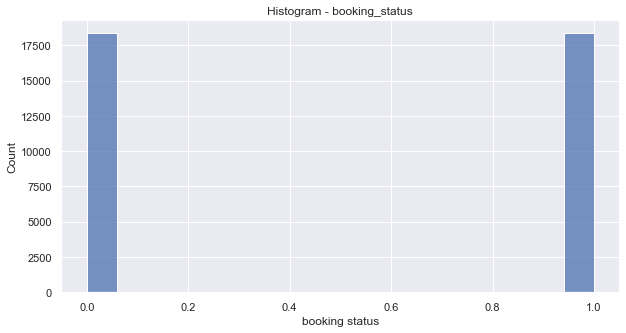

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.histplot(Y_train).set(title="Histogram - booking_status")
plt.show()

Next, we'll proceed with the execution of model training.

### 5. Model Training and Evaluationm

Logistic Regression

In [27]:
Logitclassifier =  LogisticRegression(max_iter=3000)
Logitclassifier.fit(X_train, Y_train)
y_pred_lr = Logitclassifier.predict(x_test)
y_pred_proba_lr = Logitclassifier.predict_proba(x_test)[:, 1]

In [28]:
accuracy = accuracy_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("ROC AUC:", roc_auc)

Accuracy: 0.7786774628879892
Recall: 0.8174083769633508
Precision: 0.8543091655266758
ROC AUC: 0.847348770198501


K-Nearest Neighbours

In [29]:
n = 2
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(x_test)
y_pred_proba_knn = knn.predict_proba(x_test)[:, 1]

In [30]:
accuracy = accuracy_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("ROC AUC:", roc_auc)

Accuracy: 0.759184285500075
Recall: 0.7225130890052356
Precision: 0.9083927591881514
ROC AUC: 0.8364908596682863


SVM

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(x_test)
y_pred_proba_svm = svm.predict_proba(x_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_pred_proba_svm)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("ROC AUC:", roc_auc)

Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
y_pred_dt = dtree.predict(x_test)
y_pred_proba_dt = dtree.predict_proba(x_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("ROC AUC:", roc_auc)

The decision tree classifier demonstrates high effectiveness in predicting hotel booking cancellations with highest accuracy rate of approximately 84.84%, indicating that it correctly identifies cancellations and non-cancellations. It also has highest precision of 90.01% and recall of 87.67% reveal that it not only accurately predicts a high proportion of actual cancellations but also maintains a low rate of false positives.

In [ ]:
models = ['Logitclassifier', 'knn', 'svm', 'dtree']
pred_probas = [y_pred_proba_lr, y_pred_proba_knn, y_pred_proba_svm, y_pred_proba_dt]
preds = [y_pred_lr, y_pred_knn, y_pred_svm, y_pred_dt]

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, y_pred_proba in zip(models, pred_probas):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()
for i, (name, y_pred) in enumerate(zip(models, preds)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix of {name}')
    axes[i].set_ylabel('Actual')
    axes[i].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

The AUC for the logistic classifier is the highest (0.85), indicating it has the best overall performance among the four classifiers.
The knn and dtree have the same AUC (0.84), which is slightly less than the logistic classifier, indicating a good but slightly inferior performance.
The svm has the lowest AUC (0.80), suggesting it is the least performant in terms of ROC.

The decision tree has the highest number of true positives (4019), and it also has highest number of correct predictions. We focus on maximizing TP, as predicting actual cancellations can help mitigate revenue loss. Therefore, decision tree has best performance from confusion matrix.